<a href="https://colab.research.google.com/github/binhluong84/Machine-Learning/blob/main/NYC_Restaurant_Inspection_Result_Prediction_(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/gdrive/MyDrive/DOHMH_New_York_City_Restaurant_Inspection_Results.csv/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [4]:
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399918 entries, 0 to 399917
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  399918 non-null  int64  
 1   DBA                    399559 non-null  object 
 2   BORO                   399918 non-null  object 
 3   BUILDING               399809 non-null  object 
 4   STREET                 399909 non-null  object 
 5   ZIPCODE                399909 non-null  float64
 6   PHONE                  399913 non-null  object 
 7   CUISINE DESCRIPTION    399918 non-null  object 
 8   INSPECTION DATE        399918 non-null  object 
 9   ACTION                 398783 non-null  object 
 10  VIOLATION CODE         393414 non-null  object 
 11  VIOLATION DESCRIPTION  392939 non-null  object 
 12  CRITICAL FLAG          399918 non-null  object 
 13  SCORE                  376704 non-null  float64
 14  GRADE                  195413 non-nu

In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop CAMIS and DBA columns
    df = df.drop(['CAMIS', 'DBA'], axis=1)
    
    # Drop unnecessary (duplicate) column
    df = df.drop('VIOLATION DESCRIPTION', axis=1)
    
    # Drop single-value column
    df = df.drop('RECORD DATE', axis=1)
    
    # Drop columns with more than 25% missing values
    missing_value_columns = df.columns[df.isna().mean() >= 0.25]
    df = df.drop(missing_value_columns, axis=1)
    
    # Drop high-cardinality columns
    high_cardinality_columns = [
        'BUILDING',
        'STREET',
        'PHONE',
    ]
    df = df.drop(high_cardinality_columns, axis=1)
    
    # Convert ZIPCODE column into a string column
    df['ZIPCODE'] = df['ZIPCODE'].astype(str)
    
    # Drop rows with missing target values
    missing_target_rows = df[df['CRITICAL FLAG'] == 'Not Applicable'].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill missing values
    df['SCORE'] = df['SCORE'].fillna(df['SCORE'].mean())
    
    # Extract date features
    df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
    df['INSPECTION YEAR'] = df['INSPECTION DATE'].apply(lambda x: x.year)
    df['INSPECTION MONTH'] = df['INSPECTION DATE'].apply(lambda x: x.month)
    df['INSPECTION DAY'] = df['INSPECTION DATE'].apply(lambda x: x.day)
    df = df.drop('INSPECTION DATE', axis=1)
    
    # One-hot encode remaining categorical columns
    for column in df.select_dtypes('object').columns.drop('CRITICAL FLAG'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['CRITICAL FLAG']
    X = df.drop('CRITICAL FLAG', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [8]:
X_train

,SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10001.0,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,ZIPCODE_10005.0,ZIPCODE_10006.0,ZIPCODE_10007.0,ZIPCODE_10009.0,ZIPCODE_10010.0,ZIPCODE_10011.0,ZIPCODE_10012.0,ZIPCODE_10013.0,ZIPCODE_10014.0,ZIPCODE_10016.0,ZIPCODE_10017.0,ZIPCODE_10018.0,ZIPCODE_10019.0,ZIPCODE_10020.0,ZIPCODE_10021.0,ZIPCODE_10022.0,ZIPCODE_10023.0,ZIPCODE_10024.0,ZIPCODE_10025.0,ZIPCODE_10026.0,ZIPCODE_10027.0,ZIPCODE_10028.0,ZIPCODE_10029.0,ZIPCODE_10030.0,ZIPCODE_10031.0,ZIPCODE_10032.0,ZIPCODE_10033.0,ZIPCODE_10034.0,ZIPCODE_10035.0,ZIPCODE_10036.0,ZIPCODE_10037.0,ZIPCODE_10038.0,ZIPCODE_10039.0,ZIPCODE_10040.0,ZIPCODE_10044.0,ZIPCODE_10048.0,ZIPCODE_10055.0,ZIPCODE_10057.0,ZIPCODE_10065.0,ZIPCODE_10069.0,ZIPCODE_10075.0,ZIPCODE_10103.0,ZIPCODE_10104.0,ZIPCODE_10105.0,ZIPCODE_10106.0,ZIPCODE_10107.0,ZIPCODE_10110.0,ZIPCODE_10111.0,ZIPCODE_10112.0,ZIPCODE_10118.0,ZIPCODE_10119.0,ZIPCODE_10121.0,ZIPCODE_10123.0,ZIPCODE_10128.0,ZIPCODE_10152.0,ZIPCODE_10153.0,ZIPCODE_10154.0,ZIPCODE_10155.0,ZIPCODE_10165.0,ZIPCODE_10166.0,ZIPCODE_10167.0,ZIPCODE_10168.0,ZIPCODE_10169.0,ZIPCODE_10170.0,ZIPCODE_10171.0,ZIPCODE_10172.0,ZIPCODE_10173.0,ZIPCODE_10174.0,ZIPCODE_10175.0,ZIPCODE_10176.0,ZIPCODE_10178.0,ZIPCODE_10179.0,ZIPCODE_10199.0,ZIPCODE_10270.0,ZIPCODE_10271.0,ZIPCODE_10279.0,ZIPCODE_10280.0,ZIPCODE_10281.0,ZIPCODE_10282.0,ZIPCODE_10285.0,ZIPCODE_10301.0,ZIPCODE_10302.0,ZIPCODE_10303.0,ZIPCODE_10304.0,ZIPCODE_10305.0,ZIPCODE_10306.0,ZIPCODE_10307.0,ZIPCODE_10308.0,ZIPCODE_10309.0,ZIPCODE_10310.0,ZIPCODE_10311.0,ZIPCODE_10312.0,ZIPCODE_10314.0,ZIPCODE_10317.0,ZIPCODE_10451.0,ZIPCODE_10452.0,ZIPCODE_10453.0,ZIPCODE_10454.0,ZIPCODE_10455.0,ZIPCODE_10456.0,ZIPCODE_10457.0,ZIPCODE_10458.0,ZIPCODE_10459.0,ZIPCODE_10460.0,ZIPCODE_10461.0,ZIPCODE_10462.0,ZIPCODE_10463.0,ZIPCODE_10464.0,ZIPCODE_10465.0,ZIPCODE_10466.0,ZIPCODE_10467.0,ZIPCODE_10468.0,ZIPCODE_10469.0,ZIPCODE_10470.0,ZIPCODE_10471.0,ZIPCODE_10472.0,ZIPCODE_10473.0,ZIPCODE_10474.0,ZIPCODE_10475.0,ZIPCODE_11001.0,ZIPCODE_11004.0,ZIPCODE_11005.0,ZIPCODE_11040.0,ZIPCODE_11101.0,ZIPCODE_11102.0,ZIPCODE_11103.0,ZIPCODE_11104.0,ZIPCODE_11105.0,ZIPCODE_11106.0,ZIPCODE_11109.0,ZIPCODE_11201.0,ZIPCODE_11203.0,ZIPCODE_11204.0,ZIPCODE_11205.0,ZIPCODE_11206.0,ZIPCODE_11207.0,ZIPCODE_11208.0,ZIPCODE_11209.0,ZIPCODE_11210.0,ZIPCODE_11211.0,ZIPCODE_11212.0,ZIPCODE_11213.0,ZIPCODE_11214.0,ZIPCODE_11215.0,ZIPCODE_11216.0,ZIPCODE_11217.0,ZIPCODE_11218.0,ZIPCODE_11219.0,ZIPCODE_11220.0,ZIPCODE_11221.0,ZIPCODE_11222.0,ZIPCODE_11223.0,ZIPCODE_11224.0,ZIPCODE_11225.0,ZIPCODE_11226.0,ZIPCODE_11228.0,ZIPCODE_11229.0,ZIPCODE_11230.0,ZIPCODE_11231.0,ZIPCODE_11232.0,ZIPCODE_11233.0,ZIPCODE_11234.0,ZIPCODE_11235.0,ZIPCODE_11236.0,ZIPCODE_11237.0,ZIPCODE_11238.0,ZIPCODE_11239.0,ZIPCODE_11241.0,ZIPCODE_11242.0,ZIPCODE_11249.0,ZIPCODE_11256.0,ZIPCODE_11352.0,ZIPCODE_11354.0,ZIPCODE_11355.0,ZIPCODE_11356.0,ZIPCODE_11357.0,ZIPCODE_11358.0,ZIPCODE_11360.0,ZIPCODE_11361.0,ZIPCODE_11362.0,ZIPCODE_11363.0,ZIPCODE_11364.0,ZIPCODE_11365.0,ZIPCODE_11366.0,ZIPCODE_11367.0,ZIPCODE_11368.0,ZIPCODE_11369.0,ZIPCODE_11370.0,ZIPCODE_11371.0,ZIPCODE_11372.0,ZIPCODE_11373.0,ZIPCODE_11374.0,ZIPCODE_11375.0,ZIPCODE_11377.0,ZIPCODE_11378.0,ZIPCODE_11379.0,ZIPCODE_11385.0,ZIPCODE_11411.0,ZIPCODE_11412.0,ZIPCODE_11413.0,ZIPCODE_11414.0,ZIPCODE_11415.0,ZIPCODE_11416.0,ZIPCODE_11417.0,ZIPCODE_11418.0,ZIPCODE_11419.0,ZIPCODE_11420.0,ZIPCODE_11421.0,ZIPCODE_11422.0,ZIPCODE_11423.0,ZIPCODE_11426.0,ZIPCODE_11427.0,ZIPCODE_11428.0,ZIPCODE_11429.0,ZIPCODE_11430.0,ZIPCODE_11432.0,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0,CUISINE DESCRIPTION_Afghan,CUISINE DESCRIPTION_African,CUISINE DESCRIPTION_American,CUISINE DESCRIPTION_Armenian,CUISINE DESCRIPTION_Asian,CUISINE DESCRIPTION_Australian,CUISINE DESCRIPTION_Bage

In [9]:
y_train

321699    Not Critical
129081    Not Critical
295919    Not Critical
185568        Critical
81405         Critical
              ...     
73349     Not Critical
371403    Not Critical
312201    Not Critical
267336        Critical
128037    Not Critical
Name: CRITICAL FLAG, Length: 275057, dtype: object

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
acc = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

Test Accuracy: 100.00%


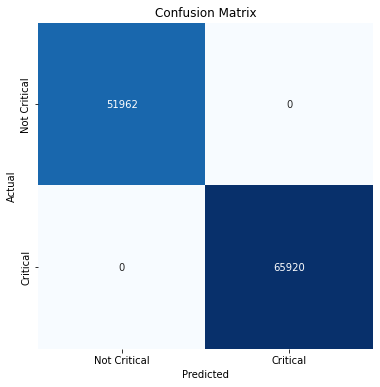

Classification Report:
----------------------
               precision    recall  f1-score   support

Not Critical       1.00      1.00      1.00     51962
    Critical       1.00      1.00      1.00     65920

    accuracy                           1.00    117882
   macro avg       1.00      1.00      1.00    117882
weighted avg       1.00      1.00      1.00    117882



In [12]:
# Confusion matrix and classification

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Not Critical', 'Critical'])
clr = classification_report(y_test, y_pred, labels=['Not Critical', 'Critical'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)